In [1]:
from statsbombpy import sb
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings; warnings.simplefilter('ignore')
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np

In [2]:
euro_matches = sb.matches(competition_id=55, season_id=282)
matches = euro_matches["match_id"]

In [3]:
df_list = []
for i in matches:
    df = sb.events(i)
    df_list.append(df)

events = pd.concat(df_list, ignore_index=True)

In [4]:
events

,50_50,bad_behaviour_card,ball_receipt_outcome,block_deflection,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,goalkeeper_success_in_play,ball_recovery_offensive,dribble_no_touch,pass_miscommunication,player_off_permanent,goalkeeper_penalty_saved_to_post,goalkeeper_shot_saved_off_target,shot_follows_dribble,shot_saved_off_target,shot_redirect
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
shots = events[events["type"] == "Shot"]
shots = shots[["shot_type", "shot_end_location", "shot_one_on_one", "shot_first_time", "shot_technique", "shot_body_part", "shot_deflected", "shot_statsbomb_xg", "shot_aerial_won", "shot_outcome"]]
shots.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1340 entries, 3440 to 187800
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shot_type          1340 non-null   object 
 1   shot_end_location  1340 non-null   object 
 2   shot_one_on_one    53 non-null     object 
 3   shot_first_time    380 non-null    object 
 4   shot_technique     1340 non-null   object 
 5   shot_body_part     1340 non-null   object 
 6   shot_deflected     35 non-null     object 
 7   shot_statsbomb_xg  1340 non-null   float64
 8   shot_aerial_won    133 non-null    object 
 9   shot_outcome       1340 non-null   object 
dtypes: float64(1), object(9)
memory usage: 115.2+ KB


In [6]:
shots

,shot_type,shot_end_location,shot_one_on_one,shot_first_time,shot_technique,shot_body_part,shot_deflected,shot_statsbomb_xg,shot_aerial_won,shot_outcome
3440,Open Play,"[120.0, 37.4, 2.0]",NaN,NaN,Normal,Right Foot,NaN,0.048935,NaN,Goal
3441,Open Play,"[118.3, 37.6, 0.3]",NaN,NaN,Normal,Right Foot,NaN,0.028932,NaN,Saved
3442,Open Play,"[106.2, 41.7]",NaN,NaN,Normal,Left Foot,NaN,0.071750,NaN,Blocked
3443,Penalty,"[120.0, 36.5, 0.2]",NaN,NaN,Normal,Right Foot,NaN,0.783500,NaN,Goal
3444,Open Play,"[117.7, 46.1, 0.3]",NaN,NaN,Normal,Right Foot,NaN,0.188995,NaN,Saved
...,...,...,...,...,...,...,...,...,...,...
187796,Open Play,"[120.0, 41.9, 6.8]",NaN,True,Half Volley,Left Foot,NaN,0.021256,NaN,Off T
187797,Open Play,"[118.0, 41.4, 1.4]",NaN,NaN,Normal,Left Foot,NaN,0.026379,NaN,Saved
187798,Open Play,"[120.0, 36.3, 5.6]",NaN,NaN,Normal,Left Foot,NaN,0.030833,NaN,Off T
187799,Open Play,"[109.1, 46.4]",NaN,NaN,Normal,Head,NaN,0.060526,True,Wayward


In [7]:
technique_mapping = {"Backheel": 1, "Diving Header": 2, "Half Volley": 3, "Lob": 4, "Normal": 5, "Overhead Kick" : 6, "Volley": 7}
body_part_mapping = {"Head": 1, "Left Foot": 2, "Other": 3, "Right Foot": 4}
type_mapping = {"Corner": 1, "Free Kick": 2, "Open Play": 3, "Penalty": 4, "Kick Off": 5}
outcome_mapping = {"Blocked": 0, "Off T": 0, "Post": 0, "Saved": 0, "Wayward": 0, "Saved Off T": 0, "Saved To Post": 0}

In [8]:
shots["shot_technique"]  = shots["shot_technique"].map(technique_mapping)
shots["shot_body_part"]  = shots["shot_body_part"].map(body_part_mapping)
shots["shot_type"]  = shots["shot_type"].map(type_mapping)
shots["shot_outcome"]  = shots["shot_outcome"].map(outcome_mapping)

In [9]:
def classify_boolean(term):
    x = term
    if x == "True":
        return 1
    else:
        return 0 

In [10]:
shots["shot_one_on_one"] = shots["shot_one_on_one"].apply(classify_boolean)
shots["shot_deflected"] = shots["shot_deflected"].apply(classify_boolean)
shots["shot_aerial_won"] = shots["shot_aerial_won"].apply(classify_boolean)
shots["shot_first_time"] = shots["shot_first_time"].apply(classify_boolean)
shots["shot_outcome"].fillna(1, inplace=True)

In [11]:
shots = shots.reset_index(drop=True)
shots

,shot_type,shot_end_location,shot_one_on_one,shot_first_time,shot_technique,shot_body_part,shot_deflected,shot_statsbomb_xg,shot_aerial_won,shot_outcome
0,3,"[120.0, 37.4, 2.0]",0,0,5,4,0,0.048935,0,1.0
1,3,"[118.3, 37.6, 0.3]",0,0,5,4,0,0.028932,0,0.0
2,3,"[106.2, 41.7]",0,0,5,2,0,0.071750,0,0.0
3,4,"[120.0, 36.5, 0.2]",0,0,5,4,0,0.783500,0,1.0
4,3,"[117.7, 46.1, 0.3]",0,0,5,4,0,0.188995,0,0.0
...,...,...,...,...,...,...,...,...,...,...
1335,3,"[120.0, 41.9, 6.8]",0,0,3,2,0,0.021256,0,0.0
1336,3,"[118.0, 41.4, 1.4]",0,0,5,2,0,0.026379,0,0.0
1337,3,"[120.0, 36.3, 5.6]",0,0,5,2,0,0.030833,0,0.0
1338,3,"[109.1, 46.4]",0,0,5,1,0,0.060526,0,0.0


In [12]:
shots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shot_type          1340 non-null   int64  
 1   shot_end_location  1340 non-null   object 
 2   shot_one_on_one    1340 non-null   int64  
 3   shot_first_time    1340 non-null   int64  
 4   shot_technique     1340 non-null   int64  
 5   shot_body_part     1340 non-null   int64  
 6   shot_deflected     1340 non-null   int64  
 7   shot_statsbomb_xg  1340 non-null   float64
 8   shot_aerial_won    1340 non-null   int64  
 9   shot_outcome       1340 non-null   float64
dtypes: float64(2), int64(7), object(1)
memory usage: 104.8+ KB


In [13]:
X = shots[["shot_type", "shot_one_on_one", "shot_first_time", "shot_technique", "shot_body_part", "shot_deflected", "shot_statsbomb_xg", "shot_aerial_won"]]
y = shots["shot_outcome"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
clf = SVC()


In [16]:
clf.fit(X_train, y_train) # type: ignore

SVC()

In [17]:
# Making predictions
y_pred = clf.predict(X_test)

In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.914179104477612
Confusion Matrix:
 [[244   1]
 [ 22   1]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.95       245
         1.0       0.50      0.04      0.08        23

    accuracy                           0.91       268
   macro avg       0.71      0.52      0.52       268
weighted avg       0.88      0.91      0.88       268



## PCA

In [19]:
# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

In [20]:

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)


In [21]:
clf = SVC(kernel='linear') 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.914179104477612
Confusion Matrix:
 [[245   0]
 [ 23   0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      1.00      0.96       245
         1.0       0.00      0.00      0.00        23

    accuracy                           0.91       268
   macro avg       0.46      0.50      0.48       268
weighted avg       0.84      0.91      0.87       268



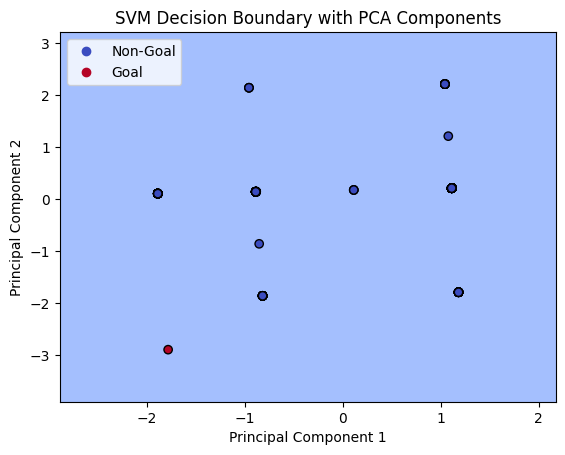

In [23]:
def plot_decision_boundary(clf, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    plt.legend(handles=scatter.legend_elements()[0], labels=['Non-Goal', 'Goal'])
    plt.show()

plot_decision_boundary(clf, X_test, y_test, 'SVM Decision Boundary with PCA Components')